Sorry, if my English is bad )

### Dataset loading and analysis

In [26]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_columns', 50) 

# upload dataframe with information about students
students = pd.read_csv('stud_math.xls')
display(students.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [27]:
students.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

##### We have small-sized dataset with 30 columns

In [28]:
print(f'There are {students.isnull().any().sum()} columns in dataset with missing values.')
print(f'There are {len(students[students.isnull().max(axis = 1)])} rows in dataset with NaN.')

There are 27 columns in dataset with missing values.
There are 298 rows in dataset with NaN.


##### There are too many columns with NaN in dataset. We can't drop such rows

In [29]:
# function for creating boxplot for every column
def get_boxplot(col_name, resource_col):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=col_name, y=resource_col, 
                data=students.loc[students.loc[:, col_name].isin(students.loc[:, col_name].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + col_name)
    plt.show()
    
    
# function for significance test
def get_stat_dif(df, col_name, resource_col):
    cols = df.loc[:, col_name].value_counts().index[:100]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        pvalue = ttest_ind(df.loc[df.loc[:, col_name] == comb[0], resource_col], 
                        df.loc[df.loc[:, col_name] == comb[1], resource_col], nan_policy = "omit").pvalue
        alpha = 0.05/len(combinations_all)
        if pvalue <= alpha:
            print(f'Statistically significant differences found for column {col_name} \
                (pvalue: {round(pvalue,4)} <= alpha: {round(alpha, 4)})')
            break   

##### Let's analyse every column

In [30]:
categorial_col = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
                  'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
                  'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                  'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
                  'freetime', 'goout', 'health']

for col in categorial_col:
    df = pd.DataFrame(students[col].value_counts(dropna=False))
    df["percent"] = round(df[col]/len(students)*100, 0)
    display(df)

,school,percent
GP,349,88.0
MS,46,12.0


,sex,percent
F,208,53.0
M,187,47.0


,address,percent
U,295,75.0
R,83,21.0
NaN,17,4.0


,famsize,percent
GT3,261,66.0
LE3,107,27.0
NaN,27,7.0


,Pstatus,percent
T,314,79.0
NaN,45,11.0
A,36,9.0


,Medu,percent
4.0,131,33.0
2.0,102,26.0
3.0,97,25.0
1.0,59,15.0
0.0,3,1.0
NaN,3,1.0


,Fedu,percent
2.0,106,27.0
3.0,96,24.0
4.0,88,22.0
1.0,78,20.0
NaN,24,6.0
0.0,2,1.0
40.0,1,0.0


,Mjob,percent
other,133,34.0
services,98,25.0
at_home,58,15.0
teacher,55,14.0
health,32,8.0
NaN,19,5.0


,Fjob,percent
other,197,50.0
services,102,26.0
NaN,36,9.0
teacher,29,7.0
at_home,16,4.0
health,15,4.0


,reason,percent
course,137,35.0
home,104,26.0
reputation,103,26.0
other,34,9.0
NaN,17,4.0


,guardian,percent
mother,250,63.0
father,86,22.0
NaN,31,8.0
other,28,7.0


,traveltime,percent
1.0,242,61.0
2.0,96,24.0
NaN,28,7.0
3.0,22,6.0
4.0,7,2.0


,studytime,percent
2.0,194,49.0
1.0,103,26.0
3.0,64,16.0
4.0,27,7.0
NaN,7,2.0


,failures,percent
0.0,293,74.0
1.0,49,12.0
NaN,22,6.0
2.0,16,4.0
3.0,15,4.0


,schoolsup,percent
no,335,85.0
yes,51,13.0
NaN,9,2.0


,famsup,percent
yes,219,55.0
no,137,35.0
NaN,39,10.0


,paid,percent
no,200,51.0
yes,155,39.0
NaN,40,10.0


,activities,percent
yes,195,49.0
no,186,47.0
NaN,14,4.0


,nursery,percent
yes,300,76.0
no,79,20.0
NaN,16,4.0


,"studytime, granular",percent
-6.0,194,49.0
-3.0,103,26.0
-9.0,64,16.0
-12.0,27,7.0
NaN,7,2.0


,higher,percent
yes,356,90.0
NaN,20,5.0
no,19,5.0


,internet,percent
yes,305,77.0
no,56,14.0
NaN,34,9.0


,romantic,percent
no,240,61.0
yes,124,31.0
NaN,31,8.0


,famrel,percent
4.0,182,46.0
5.0,99,25.0
3.0,62,16.0
NaN,27,7.0
2.0,17,4.0
1.0,7,2.0
-1.0,1,0.0


,freetime,percent
3.0,153,39.0
4.0,112,28.0
2.0,63,16.0
5.0,38,10.0
1.0,18,5.0
NaN,11,3.0


,goout,percent
3.0,127,32.0
2.0,101,26.0
4.0,84,21.0
5.0,52,13.0
1.0,23,6.0
NaN,8,2.0


,health,percent
5.0,138,35.0
3.0,89,23.0
4.0,63,16.0
1.0,47,12.0
2.0,43,11.0
NaN,15,4.0


In [31]:
students[["studytime, granular", "studytime"]].corr()

,"studytime, granular",studytime
"studytime, granular",1.0,-1.0
studytime,-1.0,1.0


##### school
We have information only about 2 schools. There are no wrong or missing values. Most students study at school GP (88%)
##### sex
There are no wrong or missing values. The number of boys and girls in the sample is equal (53% boys, 47% girls))
##### address
There are no wrong values. Most students live in urban areas (75%)
There are 17 missing values. Let's see which columns "address" depends on
##### famsize (family size)
There are no wrong values. Most students live in big families (>3) (66%)
There are 27 missing values. Let's fill NaN with moda 
Alternative way to fill NaN: maybe, famsize depend on Mjob/Fjob. Maybe, family is bigger if Mjob or Fjob = "at_home"
##### Pstatus (living with one or two parents)
There are no wrong values. Most students live in full family (79%).
There are 45 missing values. Let's fill NaN with moda
##### Medu (mother's education)
There are no wrong values. Less than 1% of mothers haven't education.
There are 3 missing values. Let's fill NaN with moda
##### Fedu (father's education)
There is 1 wrong value: 40. Let 's count, that it was 4. Less than 1% of fathers haven't education.
There are 24 missing values. Let's fill NaN with moda
##### Mjob (mother's job)
There are no wrong values. There are 19 missing values. Let's fill NaN with moda
##### Fjob (father's job)
There are no wrong values. There are 36 missing values. Let's fill NaN with moda
##### reason (reason of choosing a school)
There are no wrong values. There are 17 missing values. Let's fill NaN with moda
##### guardian
There are no wrong values. Probably 7% of students were adopted (guardian = "other")
There are 38 missing values. Let's fill NaN with moda
##### traveltime (traveltime to school)
There are no wrong values. Most students spend < 30 min for travelling to school (85%).
There are 28 missing values. Let's see which columns "traveltime" depends on
##### studytime
There are no wrong values. Some students study out of school > 5 hours a day (25%).
There are 7 missing values. Let's see which columns "studytime" depends on
##### failures
There are no wrong values. 74% of students have value 0 in column "failures". We don't know, what does it mean: student hasn't failures or student has > 3 failures.
There are 7 missing values. Let's fill NaN with moda
##### schoolsup (school support)
There are no wrong values. Most students study without school support (85%).
There are 9 missing values. Let's fill NaN with moda
##### famsup (family support)
There are no wrong values. Most students study without family support (55%).
There are 39 missing values. Let's fill NaN with moda
##### paid (additional math classes)
There are no wrong values. There are 40 missing values. Let's fill NaN with moda
##### activities (additional nonlearning classes)
There are no wrong values. Half of students haven't additional nonlearning classes.
There are 14 missing values. Let's fill NaN with moda
##### nursery
There are no wrong values. Most students attended nursery (76%).
There are 16 missing values. Let's fill NaN with moda
##### studytime, granular 
There is no such column in description. Correlation of column "studytime" and column "studytime, granular" = -1. We will drop column.
##### higher (desire for higher education)
There are no wrong values. Most students want to get higher education (90%).
There are 16 missing values. Let's fill NaN with moda
##### internet (home internet)
There are no wrong values. Most students have home internet (77%).
There are 34 missing values. Let's fill NaN with moda
Alternative way to fill NaN: maybe, internet depend on address/Mjob/Fjob. In rural areas might be problems with internet. Or parents may need the internet for working.
##### romantic (having a romantic relationship)
There are no wrong values. Most students haven't romantic relationship (61%).
There are 31 missing values. Let's fill NaN with moda
##### famrel (family relationship)
There is 1 wrong value: -1. Let 's count, that the sign "-" is mistake.
Or, maybe, this student has very bad family relationship. Let's correct on 1.
Most students have good or excellent family relationship (91%).
There are 27 missing values. Let's fill NaN with moda
##### freetime
There are no wrong values. There are 8 missing values. Let's fill NaN with moda.
Alternative way to fill NaN: we don't know, what is freetime. Maybe, it's time without studytime at school, studytime out of school, activities, time for helping parents. Or, maybe, freetime include activities and studytime out of school. However, to not to fill NaN with moda we could check, is there dependence between freetime, studytime, activities and goout.
##### goout (time with friends)
There are no wrong values. 32% of students spend little time with friends (goout = 1,2)
There are 8 missing values. Let's fill NaN with moda
Alternative way to fill NaN: maybe, goout depend on freetime/health/internet/romantic/studytime. If student has bad health or romantic relationship or he like to surve internet/play online games or he study a lot, he might not have time for friends
##### health
There are no wrong values. 23% of student have bad health (health = 1,2).
There are 15 missing values. Let's fill NaN with moda

### Data transformation

In [32]:
students['Pstatus'] = students['Pstatus'].apply(lambda x: 1 if x == 'T' else 0 if x == "A" else x)
students['Fedu'] = students['Fedu'].apply(lambda x: 4 if x == 40 else x)
students['famrel'] = students['famrel'].apply(lambda x: 1 if x == -1 else x)
students['famsize'] = students['famsize'].apply(lambda x: 1 if x == "GT3" else 0 if x == "LE3" else x)
students['school'] = students['school'].apply(lambda x: 1 if x == "GP" else 0 if x == "MS" else x)
students['address'] = students['address'].apply(lambda x: 1 if x == "U" else 0 if x == "R" else x)
students['sex'] = students['sex'].apply(lambda x: 1 if x == "M" else 0 if x == "F" else x)

columns_yes_no = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for col in columns_yes_no:
    students[col] = students[col].apply(lambda x: 1 if x == "yes" else 0 if x == "no" else x)

students.drop(['studytime, granular'], axis=1, inplace=True)
categorial_col.remove('studytime, granular')

##### We will fill NaN in most columns with moda

In [33]:
fill_moda_col = ["famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "guardian", "failures", 
                 "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic", 
                 "famrel", "freetime", "goout", "health"]
for col in fill_moda_col:
    mean_value = students[col].value_counts().index[0]
    students[col].fillna(mean_value, inplace = True)

In [34]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,1,0,18,1.0,1.0,0.0,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,1,0,17,1.0,1.0,1.0,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,1,0,15,1.0,0.0,1.0,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,3.0,2.0,3.0,10.0,50.0
3,1,0,15,1.0,1.0,1.0,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,5.0,2.0,75.0
4,1,0,16,1.0,1.0,1.0,3.0,3.0,other,other,home,father,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0


##### Let's try to analize some columns and find dependences

#### traveltime

In [36]:
for col in students.columns:
    get_stat_dif(students, col, "traveltime")

Statistically significant differences found for column school                 (pvalue: 0.0 <= alpha: 0.05)
Statistically significant differences found for column address                 (pvalue: 0.0 <= alpha: 0.05)
Statistically significant differences found for column Medu                 (pvalue: 0.0007 <= alpha: 0.005)
Statistically significant differences found for column Fedu                 (pvalue: 0.0021 <= alpha: 0.005)
Statistically significant differences found for column traveltime                 (pvalue: 0.0 <= alpha: 0.0083)


In [37]:
df = students.groupby(["address", "school"], as_index = False).traveltime.mean()
df

,address,school,traveltime
0,0.0,0,2.190476
1,0.0,1,1.672727
2,1.0,0,1.529412
3,1.0,1,1.319231


##### If student study at GP and live at urban areas, than there is a probability that traveltime < 15 min. Otherwise from 15 to 30 on average

In [38]:
def get_traveltime(x):
    if np.isnan(x['traveltime']):
        if np.isnan(x['address']):
            return round(df[df['school'] == x['school']].traveltime.mean(),0)
        else:
            return round(df[(df['address'] == x['address']) & (df['school'] == x['school'])].traveltime.values[0],0)
    else:
        return x['traveltime']

students["traveltime"] = students.apply(get_traveltime, axis = 1)

#### address

In [39]:
df = students.groupby(["traveltime", "school"], as_index = False).address.mean()
df

,traveltime,school,address
0,1.0,0,0.615385
1,1.0,1,0.878151
2,2.0,0,0.500000
3,2.0,1,0.708861
4,3.0,0,0.000000
5,3.0,1,0.642857
6,4.0,0,0.000000
7,4.0,1,0.500000


##### If student study at MS and traveltime > 30 min, then there is a probability that student live in rural areas

In [40]:
def get_address(x):
    if np.isnan(x['address']):
        return round(df[(df['traveltime'] == x['traveltime']) & (df['school'] == x['school'])].address.values[0],0)
    else:
        return x['address']

students["address"] = students.apply(get_address, axis = 1)

#### studytime

In [41]:
for col in students.columns:
    get_stat_dif(students, col, "studytime")

Statistically significant differences found for column sex                 (pvalue: 0.0 <= alpha: 0.05)
Statistically significant differences found for column reason                 (pvalue: 0.0018 <= alpha: 0.0083)
Statistically significant differences found for column traveltime                 (pvalue: 0.0062 <= alpha: 0.0083)
Statistically significant differences found for column studytime                 (pvalue: 0.0 <= alpha: 0.0083)
Statistically significant differences found for column failures                 (pvalue: 0.0048 <= alpha: 0.0083)
Statistically significant differences found for column famsup                 (pvalue: 0.0293 <= alpha: 0.05)
Statistically significant differences found for column paid                 (pvalue: 0.0 <= alpha: 0.05)
Statistically significant differences found for column higher                 (pvalue: 0.001 <= alpha: 0.05)


In [42]:
students["find_failures"] = students["failures"].apply(lambda x: 0 if x == 0 or np.isnan(x) else 1)
df = students.groupby(["sex", "find_failures"], as_index = False).studytime.median()
df

,sex,find_failures,studytime
0,0,0,2.0
1,0,1,2.0
2,1,0,2.0
3,1,1,1.0


##### If boy has failures, then there is a probability that he study less than other students

In [43]:
def get_studytime(x):
    if np.isnan(x['studytime']):
        return round(df[(df['find_failures'] == x['find_failures']) & (df['sex'] == x['sex'])].studytime.values[0],0)
    else:
        return x['studytime']

students["studytime"] = students.apply(get_studytime, axis = 1)

### Analysis of numerical variables

In [44]:
# function for calculation of borders of outliers and creating histogram without outliers
def hist_without_outliers(col_name):
    perc25 = students[col_name].quantile(0.25)
    perc75 = students[col_name].quantile(0.75)
    iqr = perc75 - perc25
    min_board = perc25 - 1.5*iqr
    max_board = perc75 + 1.5*iqr
    print(f'Borders of outliers in column {col_name}: {min_board} - {max_board}')
    print(f'Count of outliers in column {col_name}: {len(students[~students[col_name].between(min_board, max_board)])}')
    students[col_name].loc[students[col_name].between(min_board, max_board)].hist(bins = 10, label = 'IQR') #range = (15, 22)
    plt.legend()
    plt.title('Distribution of '+col_name)
    
    
# function for getting information about numeric variable (describe and histogram) 
def hist_and_describe(col_name):
    students[col_name].hist(bins = 10)
    plt.title('Distribution of '+col_name)
    print("Number of missing data: ", len(students[students[col_name].isna()][col_name]))
    print(students[col_name].describe())

#### age

Number of missing data:  0
count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64


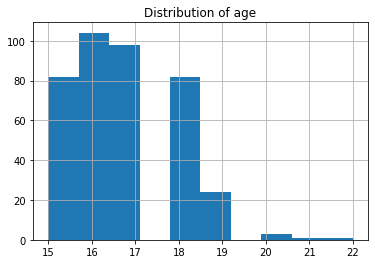

In [45]:
hist_and_describe("age")

##### There are no missing values. Some students are older than 20 years. Probably they are remained in the same class for few years. Let's check, maybe, it's outliers.

Borders of outliers in column age: 13.0 - 21.0
Count of outliers in column age: 1


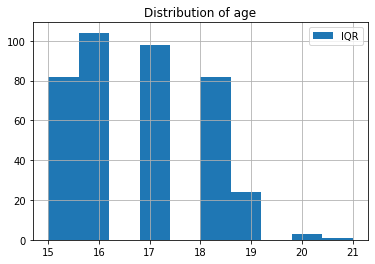

In [46]:
hist_without_outliers("age")

##### Outliers - 22 years old students. There is only one row with such value. We will drop it.

In [47]:
students = students.loc[students.age<22]

### absences

Number of missing data:  12
count    382.000000
mean       7.256545
std       23.491712
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64


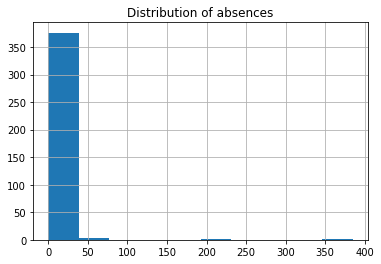

In [48]:
hist_and_describe("absences")

#### Some students skip more than 100 lessons. Let's check, maybe, there are outliers.

Borders of outliers in column absences: -12.0 - 20.0
Count of outliers in column absences: 29


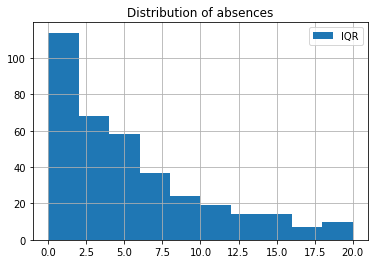

In [49]:
hist_without_outliers("absences")

#### There are outliers - students with more than 20 absences. There are only 2 rows with such values. To not to drop rows, we could change the number of absences on max value  - 20. 

In [50]:
students.absences = students.absences.apply(lambda x: 20 if x > 20 else x)

##### There are 12 missing values.

In [51]:
for col in categorial_col:
    get_stat_dif(students, col, "absences")

Statistically significant differences found for column Pstatus                 (pvalue: 0.0059 <= alpha: 0.05)
Statistically significant differences found for column reason                 (pvalue: 0.0069 <= alpha: 0.0083)
Statistically significant differences found for column guardian                 (pvalue: 0.0141 <= alpha: 0.0167)
Statistically significant differences found for column failures                 (pvalue: 0.0002 <= alpha: 0.0083)
Statistically significant differences found for column romantic                 (pvalue: 0.0433 <= alpha: 0.05)


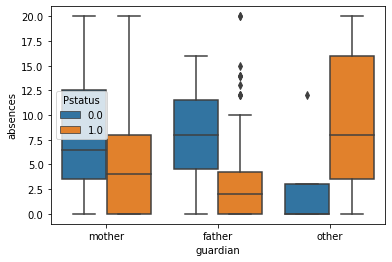

In [52]:
sns.boxplot(x="guardian", y="absences", data=students, hue="Pstatus")

In [53]:
students.groupby(["guardian", "Pstatus"]).absences.agg(['mean', 'median', 'count'])

mean  median  count
guardian Pstatus                         
father   0.0      8.000000     8.0      4
         1.0      3.925000     2.0     80
mother   0.0      8.428571     6.5     28
         1.0      4.954733     4.0    243
other    0.0      3.000000     0.0      4
         1.0      9.173913     8.0     23

##### The number of absences may depend on student 's family. Children from single-parent families and adopted children can skip lessons more often.

In [54]:
students["full_family"] = students.apply(lambda x: 1 if x['guardian'] == "other" or x['Pstatus'] == 0 else 0, axis = 1)
get_stat_dif(students, "full_family", "absences")

Statistically significant differences found for column full_family                 (pvalue: 0.0 <= alpha: 0.05)


In [55]:
df = students.groupby(["full_family"]).absences.agg(['mean', 'median', 'count'])
df.columns = ["abs_mean", "abs_median", "abs_count"]
df

,abs_mean,abs_median,abs_count
full_family,,,
0,4.699690,3.0,323
1,8.322034,7.0,59


In [56]:
def get_absences(x):
    if np.isnan(x['absences']):
        return round(df[df.index == x['full_family']].abs_mean.values[0],0)
    else:
        return x['absences']

students["absences"] = students.apply(get_absences, axis = 1)

#### score

Number of missing data:  6
count    388.000000
mean      52.293814
std       22.940126
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


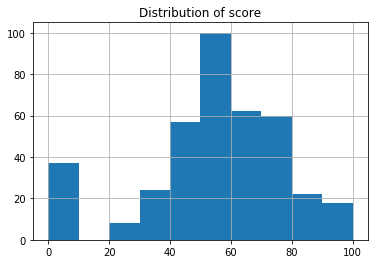

In [57]:
hist_and_describe("score")

##### There are 6 missing values. But we plan to predict scores, so we will drop such rows.

In [58]:
students.dropna(inplace = True)

#### Some students get 0 scores. Let's check, maybe, there are outliers.

Borders of outliers in column score: -5.0 - 115.0
Count of outliers in column score: 0


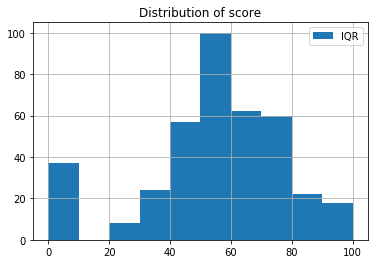

In [59]:
hist_without_outliers("score")

##### 0 scores aren't outliers . But it's strange that there are no scores from 0 to 20. Maybe, 0 scores mean that student skip exam.

##### If 0 scores mean missing exam or damaged exam form or other similar reasons, than it's better to predict missing exam separately. Scores and missing exam are not always connected. For example, student with very bad health might have excelent math knowledge, but he might skip exam. This project is for finding students in risk group, so we will try to predict scores and missing exam separately 

In [60]:
df_missing = students.copy()
df_missing["miss_exam"] = df_missing.score.apply(lambda x: 1 if x == 0 else 0)
df_missing.drop(['score'], inplace=True, axis=1)

In [61]:
students = students.loc[students.score != 0]

### Checking relationship between data columns

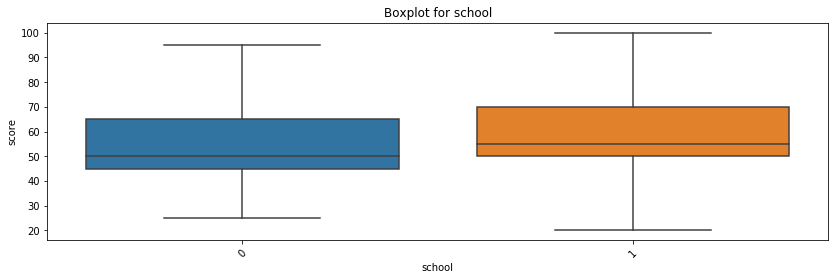

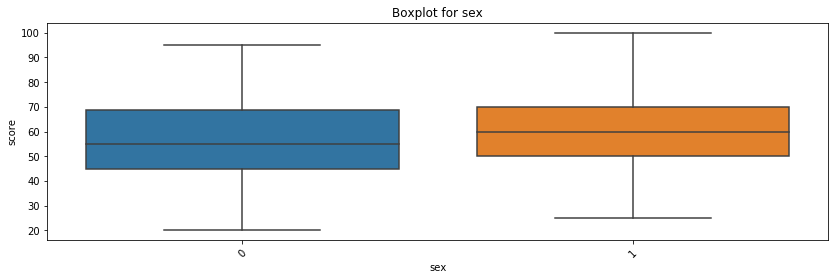

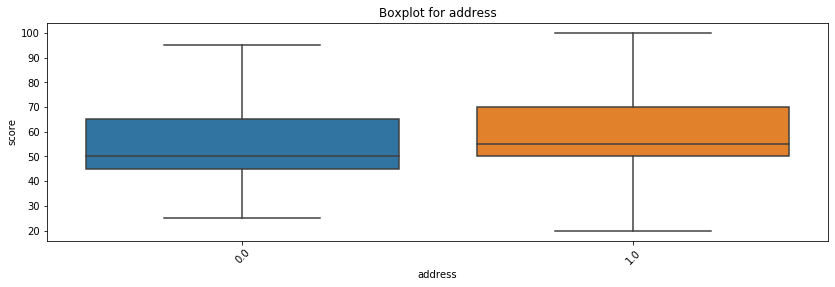

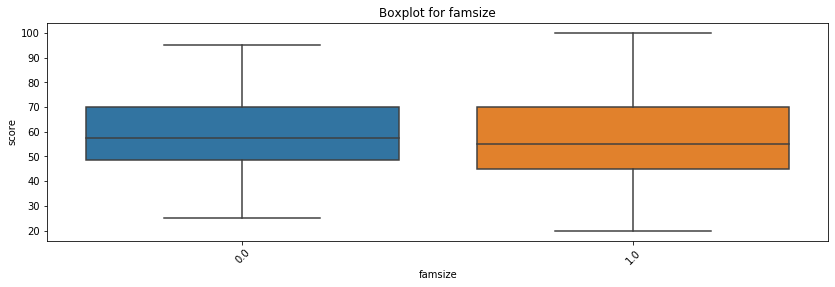

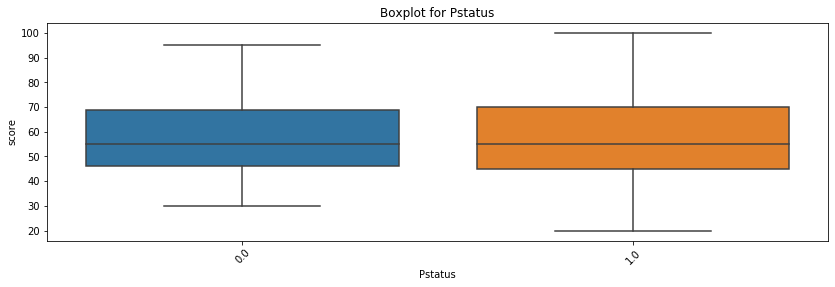

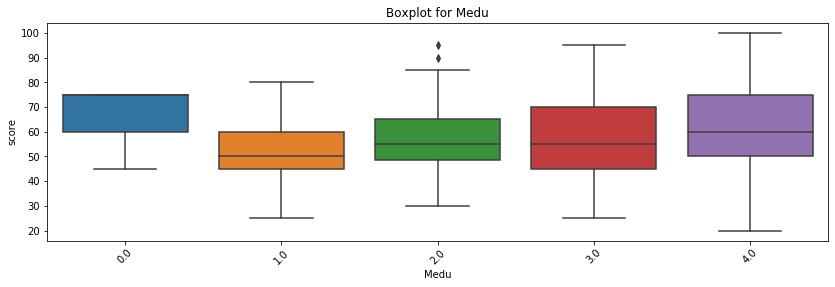

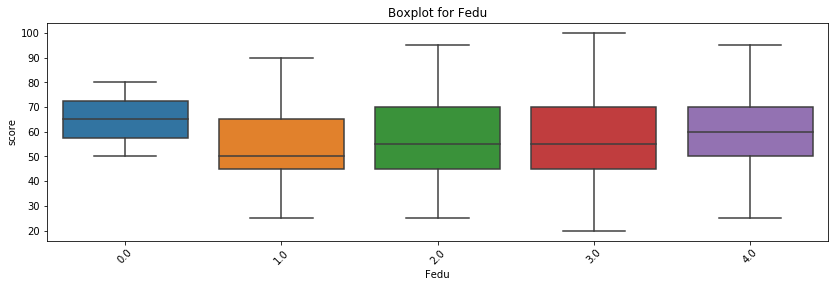

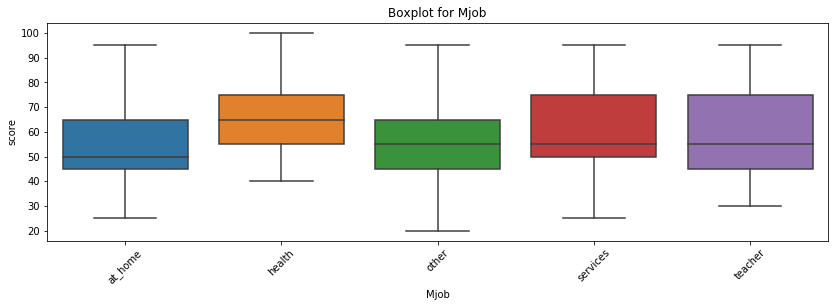

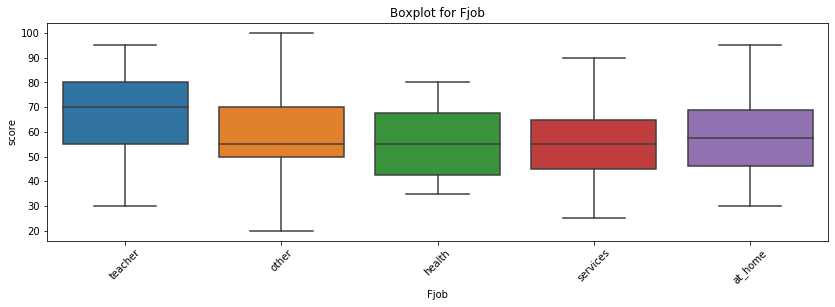

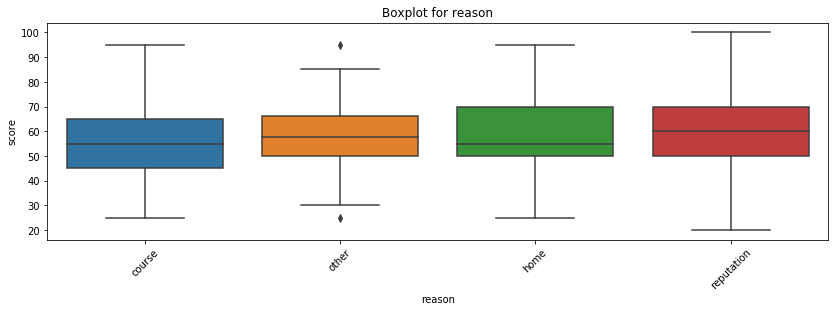

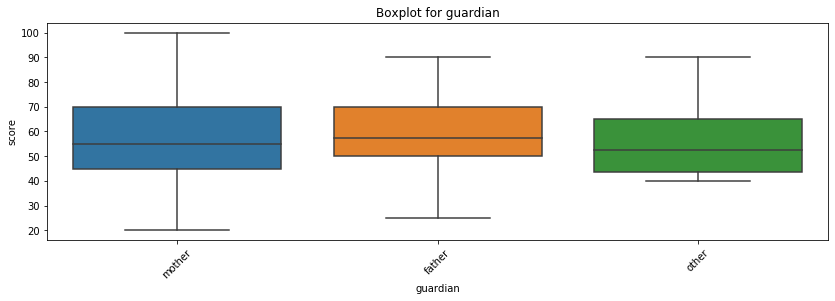

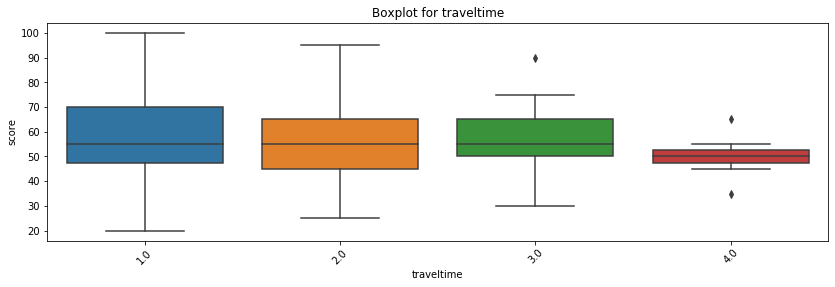

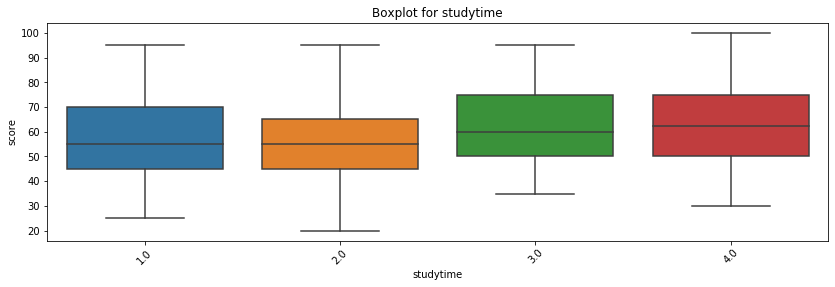

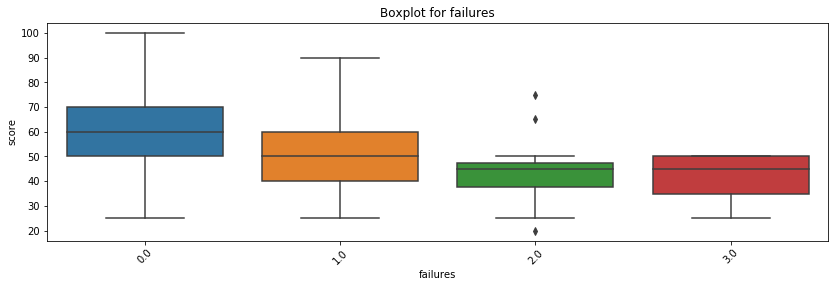

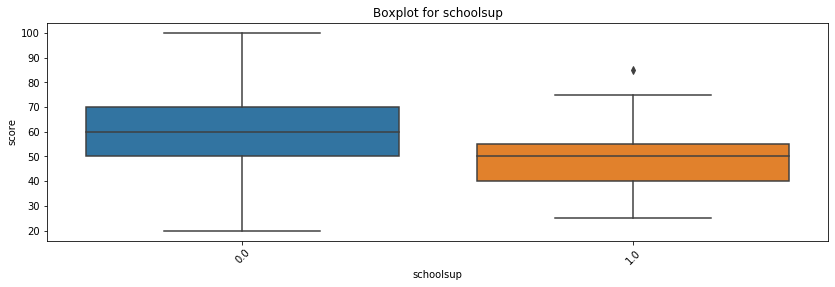

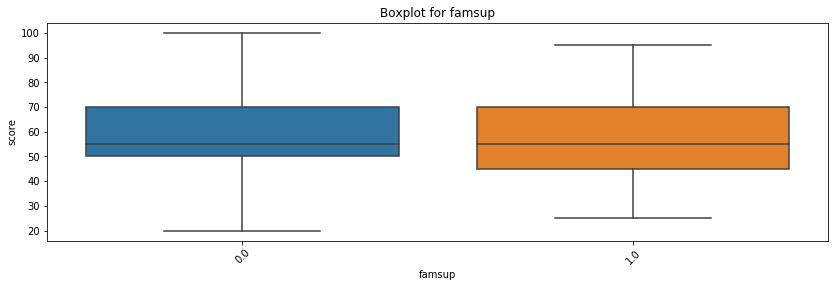

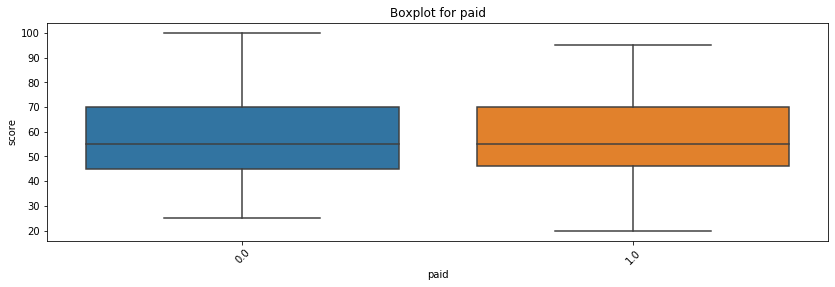

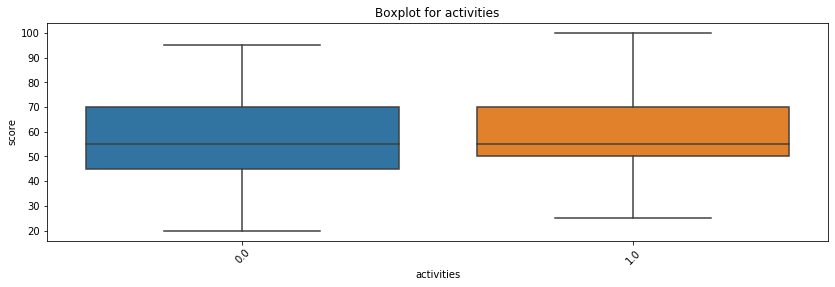

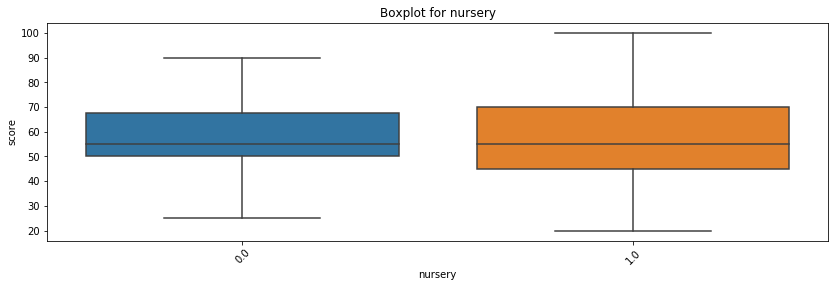

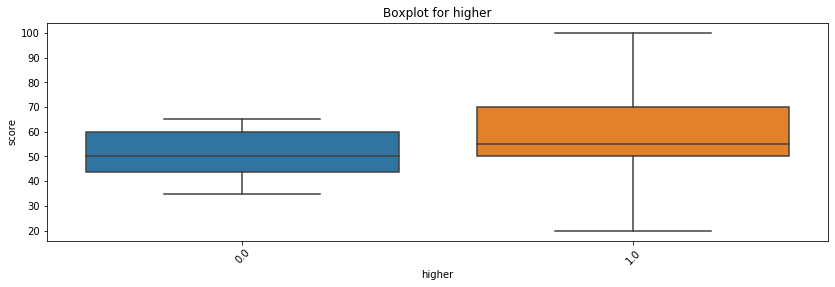

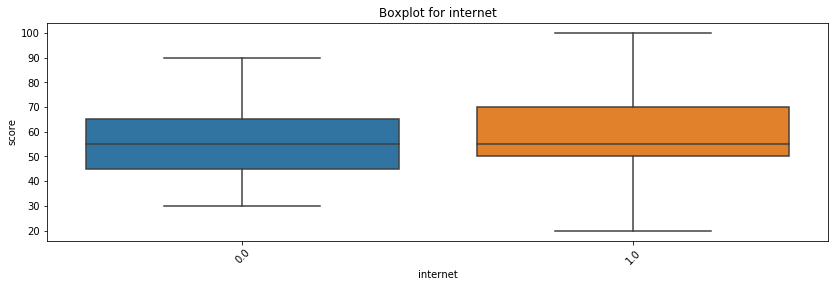

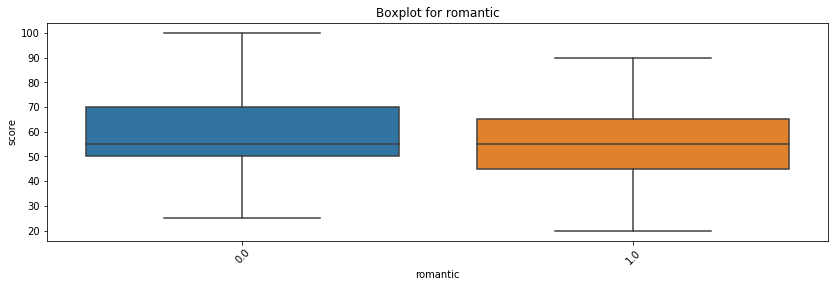

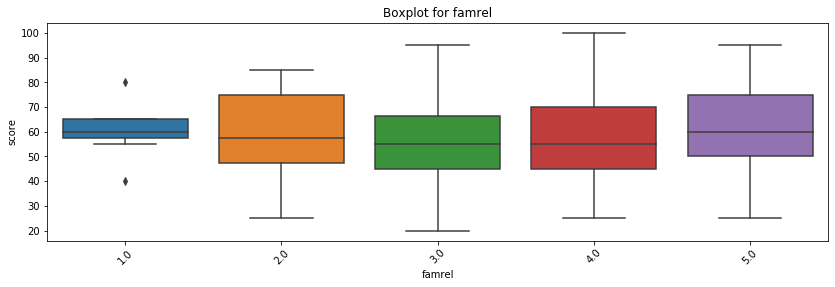

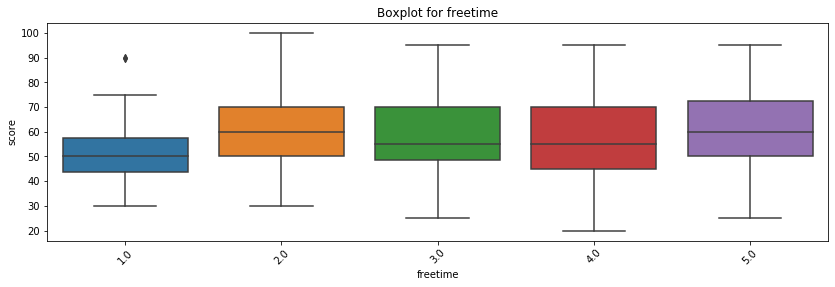

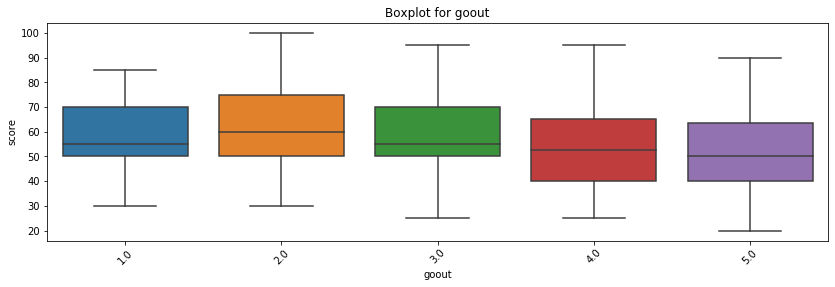

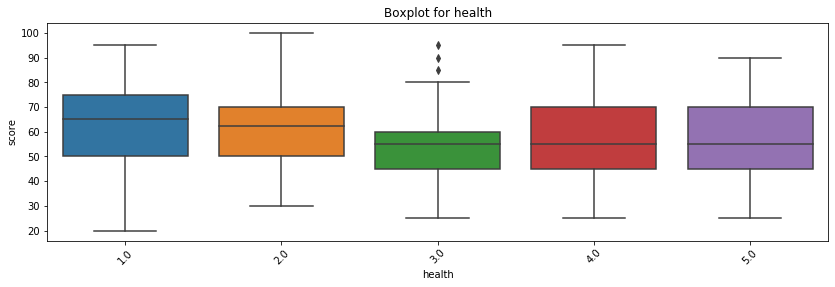

In [62]:
for col in categorial_col:
    get_boxplot(col, "score")

##### After visual analysis, it appears, that student scores are affected by:
- address. Students, that live in urban areas get slightly higher scores than others
- sex. Boys get slightly higher scores, than girls.

In [63]:
print("Median score of students GP school:", students[students.school == 1].score.median())
print("Median score of students MS school:", students[students.school == 0].score.median())

Median score of students GP school: 55.0
Median score of students MS school: 50.0


- school. Students that study at GP school get slightly higher scores, than other.

In [64]:
df = students[(students.Medu == 0) | (students.Fedu == 0)]
display(df)
print("Count of student with parents without education:", len(df))
print("Count of student with good scores, who have parents without education:", len(df[df.score > students.score.median()]))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score,find_failures,full_family
76,1,1,15,1.0,1.0,1.0,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,4.0,3.0,1.0,8.0,50.0,0,0
127,1,0,19,1.0,1.0,1.0,0.0,1.0,at_home,other,course,other,1.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,2.0,5.0,2.0,45.0,1,1
171,1,1,16,1.0,1.0,1.0,1.0,0.0,other,other,reputation,mother,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,2.0,3.0,2.0,80.0,0,0
249,1,1,16,1.0,1.0,1.0,0.0,2.0,other,other,other,mother,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,4.0,3.0,2.0,5.0,0.0,75.0,0,0
324,1,0,17,1.0,0.0,1.0,0.0,2.0,at_home,at_home,home,father,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,3.0,2.0,0.0,75.0,0,0


Count of student with parents without education: 5
Count of student with good scores, who have parents without education: 3


- Fedu, Medu. There is a slight dependence of scores and parents education. The higher the level of education of parents, the higher scores. However, when parents haven't education (Medu, Fedu = 0), students show good results. There are only 5 such rows, so it's difficult to understand is it a trend. It might be dependence (for example, parents without education insist that their children, unlike them, be educated; Or children don't want to go the parent's way).
But only three of such students have ratings above the median, and not all of them want to get higher education, so we will consider it an exception.

In [65]:
print("Median score of students whose father work as teacher:", students[students.Fjob == "teacher"].score.median())

Median score of students whose father work as teacher: 70.0


- Fjob. The scores of students whose father work as a teacher are higher than scores of students whose father has a different profession (70/55). Maybe, such fathers help students better

In [66]:
print("Median score of students whose mothers work in health:", students[students.Mjob == "health"].score.median())

Median score of students whose mothers work in health: 65.0


- Mjob. The scores of students whose mother work as in health care are higher than scores of students whose mother has a different profession (65/55).

In [67]:
print("Median score of students that study more than 10 hours:", students[students.studytime > 3].score.median())
print("Median score of students that study less than 10 hours:", students[students.studytime <=3].score.median())

Median score of students that study more than 10 hours: 62.5
Median score of students that study less than 10 hours: 55.0


- studytime. Scores of students that study more than 10 hours (studytime = 4) are higher than scores of other students (62.5/55).
- failures. The higher failures, the lower scores. But 0 in dataframe might mean, that student have more than 3 failures or that student hasn't failures. There are 74% such rows. If students haven't more than 3 failures, than dependence is obvious. 
- higher. Student, that want to get higher education are more motivated. They show better results. 

In [68]:
print("Median score of students that get school support:", students[students.schoolsup == 1].score.median())
print("Median score of students that get not school support:", students[students.schoolsup == 0].score.median())

Median score of students that get school support: 50.0
Median score of students that get not school support: 60.0


- schoolsup. It's strange, but scores of students that get school support (schoolsup = 1) are lower than scores of other students (50/60). Maybe, students with good math knowledges don't need any additional support. Only 13% of student get school support.

In [69]:
print("Median score of students with bad health:", students[students.health == 1].score.median())
print("Median score of students with not bad health:", students[students.health != 1].score.median())

Median score of students with bad health: 65.0
Median score of students with not bad health: 55.0


- health. Scores of students with very bad health (health = 1) are higher than scores of students with average health (65/55). Maybe, such students can't spend a lot of time with friends or have another activities, so they study more intensive.

##### Significance test for checking the conclusions

In [70]:
for col in categorial_col:
    get_stat_dif(students, col, "score")

Statistically significant differences found for column sex                 (pvalue: 0.0472 <= alpha: 0.05)
Statistically significant differences found for column address                 (pvalue: 0.0202 <= alpha: 0.05)
Statistically significant differences found for column Medu                 (pvalue: 0.0005 <= alpha: 0.005)
Statistically significant differences found for column Fedu                 (pvalue: 0.0044 <= alpha: 0.005)
Statistically significant differences found for column Mjob                 (pvalue: 0.0047 <= alpha: 0.005)
Statistically significant differences found for column Fjob                 (pvalue: 0.003 <= alpha: 0.005)
Statistically significant differences found for column studytime                 (pvalue: 0.0044 <= alpha: 0.0083)
Statistically significant differences found for column failures                 (pvalue: 0.0007 <= alpha: 0.0083)
Statistically significant differences found for column schoolsup                 (pvalue: 0.0 <= alpha: 0.05)
Statisti

##### Correlation

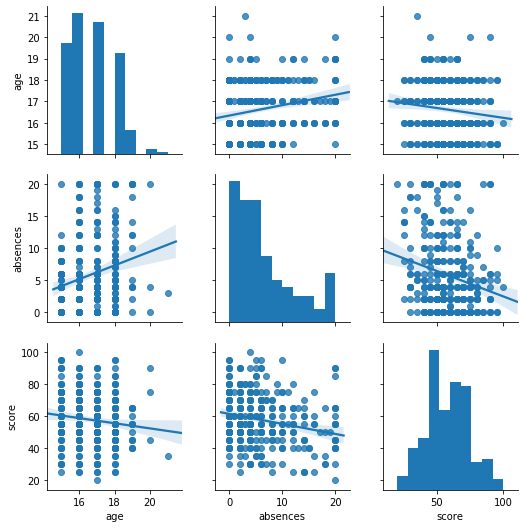

In [71]:
sns.pairplot(students, kind='reg', vars=["age", "absences", "score"])

In [72]:
#correlation matrix
students[["age", "absences", "score"]].corr()

,age,absences,score
age,1.000000,0.229476,-0.121579
absences,0.229476,1.000000,-0.223121
score,-0.121579,-0.223121,1.000000


##### Age and math scores,  absences and scores have a weak inverse dependence.  The older students, the lower scores. The more absences, the lower score.

In [73]:
students_for_model = students.loc[:, ["school", "sex", "address", 'age', 'absences', 'Medu', 'Fedu', 'Mjob', "Fjob", 
                                      "studytime", "failures", "higher", "schoolsup", "goout", 'score']]

students_for_model.head()

,school,sex,address,age,absences,Medu,Fedu,Mjob,Fjob,studytime,failures,higher,schoolsup,goout,score
0,1,0,1.0,18,6.0,4.0,4.0,at_home,teacher,2.0,0.0,1.0,1.0,4.0,30.0
1,1,0,1.0,17,4.0,1.0,1.0,at_home,other,2.0,0.0,1.0,0.0,3.0,30.0
2,1,0,1.0,15,10.0,1.0,1.0,at_home,other,2.0,3.0,1.0,1.0,2.0,50.0
3,1,0,1.0,15,2.0,4.0,2.0,health,other,3.0,0.0,1.0,0.0,2.0,75.0
4,1,0,1.0,16,4.0,3.0,3.0,other,other,2.0,0.0,1.0,0.0,2.0,50.0


##### As a result, we will use the following features to predict scores on exam: school, sex, address, age, absences, Medu, Fedu, Mjob, Fjob,     studytime, failures, higher, schoolsup, goout

### Check relationship between data columns for predicting missing exam

In [74]:
for col in categorial_col:
    get_stat_dif(df_missing, col, "miss_exam")

Statistically significant differences found for column failures                 (pvalue: 0.0004 <= alpha: 0.0083)
Statistically significant differences found for column paid                 (pvalue: 0.0072 <= alpha: 0.05)
Statistically significant differences found for column higher                 (pvalue: 0.0004 <= alpha: 0.05)
Statistically significant differences found for column romantic                 (pvalue: 0.006 <= alpha: 0.05)


##### Student might miss exam if:
- student has romantic relationship 
- student has failures in personal life
- student don't want to get higher education
- student had additional paid math classes. Maybe, if student need additional classes, he don't know math and might miss exam

In [75]:
#correlation matrix
df_missing[["age", "absences", "miss_exam"]].corr()

,age,absences,miss_exam
age,1.000000,0.177870,0.103534
absences,0.177870,1.000000,-0.291216
miss_exam,0.103534,-0.291216,1.000000


##### Age and missing exam have a weak direct dependence. The number of absences and scores has inverse dependence,  it's strange. Maybe, there are too few students who missed exam to do conclusions.

In [76]:
df_missing_for_model = df_missing.loc[:, ['age', 'romantic', 'failures', 'higher', "paid", 'miss_exam']]

df_missing_for_model.head()

,age,romantic,failures,higher,paid,miss_exam
0,18,0.0,0.0,1.0,0.0,0
1,17,0.0,0.0,1.0,0.0,0
2,15,0.0,3.0,1.0,0.0,0
3,15,1.0,0.0,1.0,1.0,0
4,16,0.0,0.0,1.0,1.0,0


##### As a result, we will use the following features to predict that the student might miss the exam: age, romantic, failures, higher, paid